# Project 1: One-Dimenstional Poisson Equation
### Robert Sutherland, Computational Physics (PHY480), Michigan State University

Note:  The first part of this notebook is a summary of the problem statement.  It is largely a reflection of material covered by the lectures or by the notes and were created solely for my own benefit.  I begin answering the questions in the Theory section.  You can use the table of contents below to jump to any given section.  Also, the first attempt can be ignored as I was unsuccessful.  I left it in the report because it was a good learning experience for me.  Sections that should be relevant for grading are marked with an asterix (*).

## Table of Contents

[1. Problem Statement](#cell1)

[2. Preliminary Theory](#cell2)

[3. Analytical Solution *](#cell7)

[4. Solution Attempt 1 (Unsuccessful)](#cell3)

[5. Program Attempt 1 (Unsuccessful)](#cell4)

[6. Solution Attempt 2 (Successful) *](#cell5)

[7. Program Attempt 2 (Successful) *](#cell6)

[8. LU Decomposition *](#cell6)

[9. Disscussion *](#cell9)

<a id="cell1"></a>
$\underline{\large{\textbf{Problem Statement:}}}$

###### Poisson's Equation
The most general expression for Poisson's Equation takes the following form:


\begin{equation}
\nabla^2\varphi = f \hspace{1.5cm}(1.1)
\end{equation}


The generality of eq.(1.1) makes it a powerful tool.  Of the systems which can be described by Poisson's equation, the most notable to the undergraduate in physics is almost certainly that of a spherically symmetrical charge distribution.       

###### Case: Spherically Symmetric Charge Distribution
We can use Poisson's equation to succinctly describe the electric potential ($\Phi$) due to an arbitrary charge distribution.

\begin{equation}
\varphi\rightarrow\Phi\hspace{1cm}\&\hspace{1cm}f \rightarrow -4\pi\rho(r) \\
\nabla^2\Phi = -4\pi\rho(r)\hspace{1.5cm}(1.2)
\end{equation}

For a system with spherical symmetry you cannot tell the difference between any two points at a given distance $r$ from the origin.  Mathematically this implies that your model must carry no angular dependence.  Under these conditions the Laplacian operator ($\nabla^2$) in eq.(1.2) simplifies considerably.  The angular derivatives are trivially zero and the partial in $r$ becoming an ordinary derivative.  Poisson's equation takes the following form.

\begin{equation}
\frac{1}{r^2}\frac{d}{dr}(r^2\frac{d\Phi}{dr}) = -4\pi\rho(r)\hspace{1.5cm}(1.3) 
\end{equation}

A substitution of $\Phi(r)=\phi(r)/r$ cleans up eq.(1.3).

\begin{equation}
\frac{d^2\phi}{dr^2} = -4\pi r\rho(r)\hspace{1.5cm}(1.4)
\end{equation}

###### Reclaiming Generality
By sending $\phi\rightarrow u$ and $r\rightarrow x$ we make a return to generality.

\begin{equation}
-u''(x)=f(x)\hspace{1.5cm}(1.5)
\end{equation}

<a id="cell2"></a>
$\underline{\large{\textbf{Preliminary Theory:}}}$

###### Translating the problem
The first step to a computer generated solution is translating eq.(1.5) into a format which the computer is apt to solve.  Computers cannot handle differential equations analytically as a human being does.  Instead we must take the problem from a differential equation to a $\textit{difference}$ equation.  A difference equation works in descrete space and accurately approximated its differential counter part if the quantization of that space is sufficiently small.  This idea can be grasped firmly by careful examination of the definition of the derivative.

\begin{equation}
\frac{df(x)}{dx} = \lim_{h\to 0} \frac{f(x+h)-f(x)}{h}\hspace{1.5cm}(2.1)
\end{equation}

Finding the derivative analytically is more an act of imagination than one of computation.  A machine is not able to observe a tendency and extrapolate the solution for the case where h actually attains an infintesimal magnitude.  Thus we must seek an approximation which tends toward the exact result for sufficiently small $h$.

In building our approximation we can again take some inspiration from basic calculus.  Before a students learns to take an integral in continuous space they first learn to operate in descrete space using Riemann sums to find the area under the curve.  In this process there are both the lower and upper Riemann sums and the best result is found by taking their average.  Similarily we will approximate the derivative from two different directions and take our final approximation to be a combination of the two resultant formulae.      

We begin with the general formula for a taylor expansion.

\begin{equation}
f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(x_0)}{n!}(x-x_0)^n\hspace{1.5cm}(2.2)
\end{equation}

We expand $f(x)$ a distance $\pm h$ about $x_0=0$ to obtain two different expansions for f(x).  I will call the expansion with $+h$ the top expansion and the expansion with $-h$ the bottom expansion.  We carry our expansions out to the $3^{rd}$ order terms.

\begin{equation}
f_{h_+} \approx f_0 + hf' + \frac{h^2f''}{2} + \frac{h^3f'''}{6} \hspace{1.5cm}(2.3)\\
f_{h_-} \approx f_0 - hf' + \frac{h^2f''}{2} - \frac{h^3f'''}{6} \hspace{1.5cm}(2.4)
\end{equation}

Taking the sum of eq.(2.3) & eq.(2.4) and solving for f'' leads to an expression which can approximate the second derivative.

\begin{equation}
f'' \approx \frac{f_{h_+} + f_{h_-} - 2f_0}{h^2} \hspace{1.5cm}(2.5)
\end{equation}

Finally we are ready to reconsider eq.(1.5).  We restrict the domain of our solutions to $x\in (0,1)$ with initial conditions $u(0) = u(1) = 0$.  Next we seek to restate eq.(1.5) as a matrix.  We quantize the space on the interval $(0,1)$ using $h = 1/(n+1)$ (where n is the number of steps) and $x_i = ih$ with $x_0=0$ and $x_{n+1}=1$. Construct a vector $\vec{v}$ to represent a descrete approximation to $u$.  The given boundary conditions give us $v_0 = v_{n+1} = 0$   We can use equation 2.5 to approximate u''(x) and rewrite eq.(1) with $f_i = f(x_i)$ where $f(x_i)$ represents the source function evaluated at $x_i$.

\begin{equation}
f_i = \frac{2v_i - v_{i+1} - v_{i-1}}{h^2} \hspace{1.5cm}(2.6)
\end{equation}

The matrix representation will look something like this with $\widetilde{b_i}=h^2f_i$.

\begin{equation}
\textbf{A}\vec{v}=\widetilde{b}\hspace{1.5cm}(2.7)
\end{equation}

The form of matrix $\textbf{A}$ can be deduced from eq.(2.6).  Vector $\vec{v}$ has elements $v_i[v_0,v_{n+1}]$.  For any given element $\widetilde{b_i}$, $\textbf{A}$ must pick out only the corresponding elements $v_{i+1}$, $v_i$, and $v_{i-1}$.  This immediately suggests that $\textbf{A}$ must be a tridiagonal matrix.  The diagonal elements will pick out $v_0$ and must contain a factor of 2.  The elements $v_{i-1}$ and $v_{i+1}$ on either side of the diagonal must have factors of -1. This means that $\textbf{A}$ takes the form below.

\begin{bmatrix}
2  & -1 & 0  & 0 & ... & ... & 0 \\
-1 &  2 & -1 & 0 & ... & ... & 0 \\
0  & -1 &  2 & -1& ... & ... & 0 \\
...& ...& ...&...& ... & ... & 0 \\
...& ...& ...&...&  -1 &  2  & -1
\end{bmatrix}

For our problem we will let $f(x)=100e^{(-10x)}$.  We have made this choice so that eq.(1.5) can be solved analytically.  We will make use of the analytical solution to evaluate the accuracy of our computational methods.  With this source term eq.(1.5) has a solution of the form $u(x)=1-(1-e^{-10})x-e^{-10x}$.  This solution can be verified by taking two derivatives and making a substitution into eq.(1.5).

\begin{equation}
u(x)=1-(1-e^{-10})x-e^{-10x} \\
u'(x)=1-e^(-10)+10e^{-10x} \\
u''(x)=-100e^{-10x} \\
-u''(x) = 100e^{-10x} = f(x)
\end{equation}

<a id="cell7"></a>
###### Analytical Solution

Elapsed time: 0.0007901191711425781 seconds


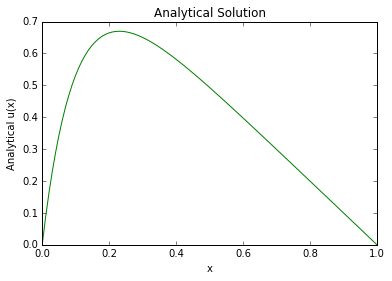

In [1]:
#timer
import time
start_time_sol = time.time()
from array import *
import math
Sol = array('f');X_sol = array('f') 
n_sol=100;h = (1)/(n_sol+1);x = 0
def u(x_i):
    u = 1 - (1 - math.exp(-10))*x_i - math.exp(-10*x_i)
    return u;
i=0
while (x < 1+h):X_sol.append(x);Sol.append(u(x));x = x + h;i=i+1
#print("Initial Point:", Sol[1]); #Initial Point
print("Elapsed time: %s seconds" % (time.time() - start_time_sol))
    
#Plotting
from pylab import *
%matplotlib inline
xlabel("x")
ylabel("Analytical u(x)")
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,0.7])
title("Analytical Solution")
plot(X_sol,Sol,color='green')

<a id="cell3"></a>
$\underline{\large{\textbf{Solution Attempt 1:}}}$

The matrix form of Poisson's equation gives us a series of linear equations of the form

\begin{equation}
a_iv_{i-1} + b_iv_{i} + c_iv_{i+1} = \widetilde{b_i} \hspace{1.5cm}(3.1)
\end{equation}

With $a_i = -1$, $b_i = 2$, and $c_i = -1$.

For $i=1$:

If we can seed the algorithm with an initial point from the analytical solution we can locate all subsequent points.

For $i=2,3,4,5...$:

\begin{align*}
I. \hspace{1.5cm} & a_{i}v_{i-1} + b_{i}v_{i} + c_{i}v_{i+1} = \widetilde{b_i} \\\\
II. \hspace{1.5cm} & v_{i+1} = \frac{\widetilde{b_i} - a_iv_{i-1} - b_iv_i}{c_i} \\\\
III. \hspace{1.5cm} & \widetilde{b_i} = h^2f(x_i) = h^2*100e^{(-10x_i)} \\\\
VI. \hspace{1.5cm} & v_{i+1} = \frac{h^2*100e^{(-10x_i)} - a_iv_{i-1} - b_iv_i}{c_i}
\end{align*}

Using the initial conditions to determine $v_0$ and the elements of $\widetilde{b}$ can be gathered from the source function.  We can then iterate the algorithm above to calculate the rest of the elements in $\vec{v}$.

###### Floating Point Operations
As it is stated above the algorithm that I have written includes 13 FLOPS per step.  However it can be noted that if I let $\widetilde{b_i} = f(x)$ instead of $\widetilde{b_i} = h^2f(x)$  I can cut two of the floating point operations out of my algorithm.  This of course means that the elements of matrix $\textbf{A}$ will all need to be divided by $h^2$ so that they will now be $a_i = \frac{-1}{h^2}$, $\widetilde{b_i} = \frac{2}{h^2}$, and $c_i = \frac{-1}{h^2}$.

At 11 FLOPS per step with a total number of n steps the total number of FLOPS in the alogorithm is given by 11n. 

<a id="cell4"></a>
$\underline{\large{\textbf{Program Attempt 1:}}}$

###### Python Array Syntax
Strangely the array data type is not a native in python.  We have to import the array type in externally.
For a quick reference on python array syntax you can check this link:
http://www.thegeekstuff.com/2013/08/python-array/

###### Lightweight vs. Generality
The program I am writing below opts for a lightweight approach to the solution.  Because the rows of matrix A contain only three nonzero elements (regardless of the matrix size) I use the array A containing only three elements
A[0] = -1; A[1] = 2; A[2] = -1.  This makes the program fast and easy, but means that it is apt to solve only this special case.   

###### Things to Consider
The end points (the boundary conditions) cannot be included in the algorithm.  The source point must essentially be guessed.  This is a pretty weak algorithm since it requires so much input information, but still making the program was a good excercize and so I am including it in the report.

In reality we will not be able to simply pluck a point from the analytical solution, so the logic here is a little circular.  However, in principle if we know the general form of the solution we could iterate guesses for an initial point until we get a solution that "looks right."

###### My Code for Attempt 1

Elapsed time: 0.0010449886322021484 seconds


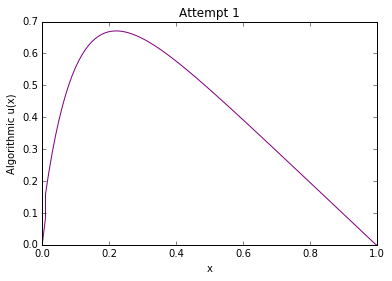

In [2]:
'''
Attempt 1: MUST RUN CHECK YOUR WORK FIRST
Solve the one-dimensional Poisson equation -u''(x) = f(x)
Where f(x) is the source function.  f(x) = 100*exp(-10x).
This gives Poisson's equation an analytical solution: u(x) = 1 - (1-exp(-10))x - exp(-10x)
We translate Poisson's equation into matrix form and attempt a solution in discrete space.
For our first attempt we solve the problem using the algorithm above for a 10X10 matrix.
'''
#Error Checking
try:
    n_sol
except NameError:
    print("MUST RUN ANALYTICAL SOLUTION SECTION FIRST")
    raise SystemExit

#timer
import time
start_time_at1 = time.time()

#Import the array module  
from array import *
import math 

#Initial Conditions
x_0 = 0.0;x_f = 1.0
v_0 = 0

#Step number n & Stepsize h
n=n_sol #step number must be equal between the two blocks of code.
h = (x_f - x_0)/(n+1)

#Matrix A array
A = array('f',[-1/h**2,2/h**2,-1/h**2])
#Spacial array
X_t1 = array('f',[x_0])
#Vector v array
v_t1 = array('f',[v_0])

#I have omitted the i=1 step from the while loop and placed it here.
x = x_0 + h
X_t1.append(x_0 + h)
#Seed the algorithm by taking a point from the analytical solution.
v_t1.append(Sol[1])
i = 1

#Setting the while loop bounds up to x_f + h because it takes the final output x-value closer to 1.0.
while (x < x_f+h):
    v_t1.append((100*math.exp(-10*x)-A[0]*v_t1[i-1]-A[1]*v_t1[i])/A[2])
    X_t1.append(x)
    x = x + h
    i = i + 1

#Known final value at x=1 from boundary conditions.    
v_t1.append(0)
X_t1.append(1)

print("Elapsed time: %s seconds" % (time.time() - start_time_at1))

#Plotting
from pylab import *
%matplotlib inline
xlabel("x")
ylabel("Algorithmic u(x)")
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,0.7])
title("Attempt 1")
plot(X_t1,v_t1,color='purple')

<a id="cell5"></a>
$\underline{\large{\textbf{Solution Attempt 2:}}}$

We will first transform the matrix elements with a forward substitution and then use a backwards substitution to get the results.  The transformed matrix elements are capped with a tilda (~).  We will represent our matrix $\textbf{A}$ as follows

\begin{bmatrix}
d_1  & e_1 & 0  & 0 & ... & ... & 0 \\
e_1 &  d_2 & e_2 & 0 & ... & ... & 0 \\
0  & e_2 &  d_3 & e_3& ... & ... & 0 \\
...& ...& ...&...& ... & ... & 0 \\
...& ...& ...&...&  0 &  e_{n-1}  & d_n
\end{bmatrix}

For i = 1:

\begin{align*}
I. d_1 = \widetilde{d_1} \\\\
II. b = \widetilde{b_1}
\end{align*}

For i = 2,3,4....

\begin{align*}
I. \widetilde{d_i} = d_i - \frac{e_{i-1}^2}{\widetilde{d_{i-1}}} \\\\
II. \widetilde{b_i} = b_i - \widetilde{b_{i-1}}\frac{e_{i-1}}{\widetilde{d_{i-1}}}
\end{align*}

After transformation our matrix will look like this

\begin{bmatrix}
d_1  & e_1 & 0  & 0 & ... & ... & 0 \\
0 &  \widetilde{d_2} & e_2 & 0 & ... & ... & 0 \\
0  & 0 &  \widetilde{d_3} & e_3& ... & ... & 0 \\
...& ...& ...&...& ... & ... & 0 \\
...& ...& ...&...&  0 &  0  & \widetilde{d_n}
\end{bmatrix}

The nth row gives us the equation 

\begin{equation}
\widetilde{d_n}x_n = \widetilde{b_4}
\end{equation}

Which can easily be solved for the nth element of vector x.

\begin{equation}
x_n = \frac{\widetilde{b_4}}{\widetilde{d_n}}
\end{equation}

Now we can begin the back substitution and find every other element in x with the following formula.

\begin{equation}
x_i = \frac{\widetilde{b_i}-e_ix_{i+1}}{\widetilde{d_i}}
\end{equation}

<a id="cell6"></a>
$\underline{\large{\textbf{Program Attempt 2:}}}$

Implementing the algorithm from class as described above.

Elapsed time algorithm: 0.0011761188507080078 seconds
Elapsed time total: 0.0019478797912597656 seconds


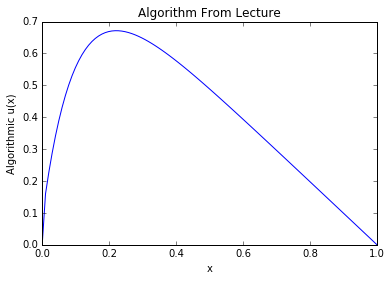

In [3]:
'''
Attempt 2
Solve the one-dimensional Poisson equation -u''(x) = f(x)
Where f(x) is the source function.  f(x) = 100*exp(-10x).
This gives Poisson's equation an analytical solution: u(x) = 1 - (1-exp(-10))x - exp(-10x)
We translate Poisson's equation into matrix form and attempt a solution in discrete space.
For our first attempt we solve the problem using the algorithm above for a 10X10 matrix.
'''
#timer
import time
start_time_at2_total = time.time()

#Import the array module  
from array import *
import math 

#Bounds, Step number n & Stepsize h
x_0 = 0.0;x_f = 1.0
n=100
h = (x_f - x_0)/(n+1)
#Initial Point
x = x_0 + h

'''
Summary of Notation:
d = diagonal elements of A
e = off diagonal elements of A
b = vector b
'''
d = array('d',[2])
e = array('d',[-1])
b = array('d',[h*h*100*math.exp(-10*x)])
while (x < x_f - h):
    d.append(2)
    e.append(-1)
    x = x + h
    b.append(h*h*100*math.exp(-10*x)) 

#Algorithm timer
start_time_at2_algorithm = time.time()
'''
Summary of Notation:
D = d tilda
B = b tilda
i = array index
'''
#Forward Substitution
x = x_0 + h
D = array('d',[d[0]])
B = array('d',[b[0]])
i = 1
while (x < x_f - h):
    D.append(d[i]-e[i-1]**2/D[i-1])
    B.append(b[i]-e[i-1]*B[i-1]/D[i-1])
    i = i + 1
    x = x + h

#free up some memeory
del d,b

i = i - 1
#Backwards Substitution
X_algorithm = array('d',[0,B[-1]/D[-1]])
x_coor = array('d',[1,x]) #for plotting later
j=1 #Keeps track of the index of x which runs backwards with respect to i
while (x >= x_0 + h):
    X_algorithm.append((B[i]-e[i]*X_algorithm[j])/D[i])
    #Free up memory as we go along
    B.pop();D.pop()
    i = i - 1
    j = j + 1
    x = x - h
    x_coor.append(x)

#Boundary Values
X_algorithm.append(0)
x_coor.append(0)
print("Elapsed time algorithm: %s seconds" % (time.time() - start_time_at2_algorithm))
print("Elapsed time total: %s seconds" % (time.time() - start_time_at2_total))

#Plotting
from pylab import *
%matplotlib inline
xlabel("x")
ylabel("Algorithmic u(x)")
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,0.7])
title("Algorithm From Lecture")
plot(x_coor,X_algorithm,color='blue')

<a id="cell8"></a>
$\underline{\large{\textbf{LU Decomposition:}}}$

Solve the problem by LU decomposition using python libraries and compare with your results from the previous section.  To do this we must take the full approach and generate matrix $\textbf{A}$ and vector $\vec{b}$.  

LU solve time: 0.0010478496551513672 seconds
Total Elapsed time: 0.007788896560668945 seconds


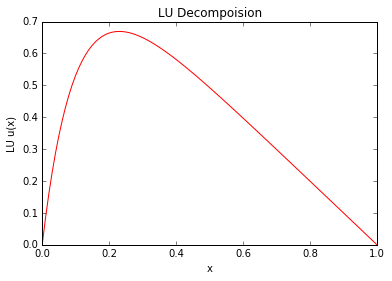

In [5]:
#BUG: If you change step size you need to run the code twice before it works
from pylab import *
import numpy as np
#timer
import time
start_time_LU_total = time.time()

x_0 = 0.0;x_f = 1.0
n=100
h = (x_f - x_0)/(n+1)

#Create the Matrix A
A_row1 = np.empty([n]);A_row1[0] = 2;A_row1[1] = -1;
i = 2
while(i<=n-1):A_row1[i] = 0;i = i+1
A_row2 = np.empty([n]);A_row2[0] = -1;A_row2[1] = 2;A_row2[2] = -1
i = 3
while(i<=n-1):A_row2[i] = 0;i = i+1    

A = np.vstack((A_row1,A_row2))

i = 1
while (i<=n-3):A_row2=np.roll(A_row2,1);A=np.vstack((A,A_row2));i=i+1

#Deals with the wrap around from np.roll
A_last=np.roll(A_row2,1);A_last[0]=0
A=np.vstack((A,A_last))

#Create space vector X
X_coor = np.empty([n])
#Create the Vector b
b = np.empty([n])
x = x_0 + h
i=0
while (x < x_f-h):
    b[i] = h*h*100*math.exp(-10*x)
    X_coor[i] = x
    x = x + h
    i = i+1

#Timer for LU decomposition    
start_time_LU = time.time()
#Solve the System
x_LU = linalg.solve(A,b)

#free up memory
del A,b

#Boundary Conditions
X_coor = np.insert(X_coor, 0, x_0);x_LU = np.insert(x_LU, 0, 0)
X_coor = np.insert(X_coor, n, x_f);x_LU = np.insert(x_LU, n, 0)

print("LU solve time: %s seconds" % (time.time() - start_time_LU))
print("Total Elapsed time: %s seconds" % (time.time() - start_time_LU_total))

#Plotting
%matplotlib inline
xlabel("x")
ylabel("LU u(x)")
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,0.7])
title("LU Decompoision")
plot(X_coor,x_LU,color='red')

In [ ]:
#Plots form all different methods
%matplotlib inline
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,0.7])
xlabel("x")

                            #Analytic
#title("Analytical Solution");ylabel("Analytical u(x)");plot(X_sol,Sol,color='green')
                            
                            #Algorithmic
#title("Algorithm From Lecture");ylabel("Analytical u(x)");plot(x_coor,X_algorithm,color='blue')

                                #LU
#title("LU Decompoision");ylabel("LU u(x)");plot(X_coor,x_LU,color='red')

<a id="cell9"></a>
$\underline{\large{\textbf{Discussion:}}}$

###### Plots for different Solutions
You can choose in the cell above to plot the data from any of the three methods we used: Analytical, Algorithmic, or LU Decomposition.  Simply uncomment the appropriate line to see the plot.  By default n=100 for all plots.  This also be used to compare the methods to each other.  You can get a qualitative feel for the error by comparing the approximation methods to the analytical solution.  

Analytical        -> Green 

Algorithmic       -> Blue  

LU Decomposition  -> Red

Graphs Generated by my Code:

|Method            | n = 10     | n = 100      | n = 1000  |
|:-----------------|:----------:|:------------:|:---------:|
| Analytical       |<img src="Project1_pics/Analytical-10.png">|<img src="Project1_pics/Analytical-100.png">|<img src="Project1_pics/Analytical-1000.png">|
| Algorithmic      |<img src="Project1_pics/Algorithm-10.png">|<img src="Project1_pics/Algorithm-100.png">|<img src="Project1_pics/Algorithm-100.png">|
| LU Decomposition |<img src="Project1_pics/LU-10.png">|<img src="Project1_pics/LU-100.png">|<img src="Project1_pics/LU-1000.png">|


###### Floating Point Operations (FLOPS)
Gaussian elimination: $2n^3/3 + O(n^2)$

LU Decomposition: $O(n^3) + O(n^2)$

###### Computation Time (s)
|Method            | n = 10     | n = 100      | n = 1000  |
|:-----------------|:----------:|:------------:|:---------:|
| Analytical       | 0.00055313 | 0.00088500   | 0.0029740 |
| Algorithmic      | 0.0019321  | 0.0041198    | 0.0083460 |
| Algorithmic Solve| 0.0011420  | 0.0023009    | 0.0062189 |
| LU Decomposition | 0.0028491  | 0.0090901    | 3.1231    |
| LU Solve         | 0.00076007 | 0.0017528    | 0.043681  |

Algorithmic and LU Decomposition list the time it takes the entire code block for those sections to run.  The Algorithmic and LU Solve data refers to the time it take to solve the matrix and excludes the time it takes to set up the matrix for each method.

We see the LU Decomposition as a whole takes longer than our algorithm, but the solve step for LU Decomposition is extremely quick.  This has to do with the fact that I had to set up the matrix $\textbf{A}$ explicity in order to use pythons built in LU Decompositions, which is computationally expensive.  However, this approach does have it's advantages.  For example, if you had a series of similar problems with different source funtions LU Decomposition would be an extremely powerful tool.  You would only have to set up $\textbf{A}$ once and then you could use it repeatedly to solve all your problems almost instantaneously.  However, for our purposes here it seems that the algorithm we discussed in lecture offers the most expedient solution.

###### Max Error 
We define the relative error ($\epsilon_i$) as follows
\begin{equation}
\epsilon_i = log_{10}(\frac{|computation_i-analytical_i|}{|analytical_i|})
\end{equation}

Max Relative Errors:

|Method            | n = 10     | n = 100      | n = 1000  | n =10000 |
| -------------    |:----------:|:------------:|:---------:|:--------:|
| Algorithmic      | 0.69611    | 0.87693      | 0.90112   | 0.90307  |
| LU Decomposition | -1.1482    | -3.0792      | -5.0770   | NA       |

<center>*I was not able to run the LU decomposition for 10000 steps.</center>

We see from the error comparison that the LU Decomposition is well worth the extra run time if you require high percision.  As we stretch out the step length the maximum relative error drops lower and lower.  For the Algorithmic method however, the maximum error stay fairly constant.  

We can also plot the relative error as a function of $log_{10}(h)$

|Method            | n = 10     | n = 100      | n = 1000  |
|:-----------------|:----------:|:------------:|:---------:|
| Algorithmic       |<img src="Project1_pics/Algorithm_Error_10.png">|<img src="Project1_pics/Algorithm_Error_100.png">|<img src="Project1_pics/Algorithm_Error_1000.png">|
| LU Decomposition  |<img src="Project1_pics/LU_Error_10.png">|<img src="Project1_pics/LU_Error_100.png">|<img src="Project1_pics/LU_Error_1000.png">|


Max Error in Algorithm for 1000 steps: 0.9011166988348032
Max Error in LU for 1000 steps: -5.0769746465601395


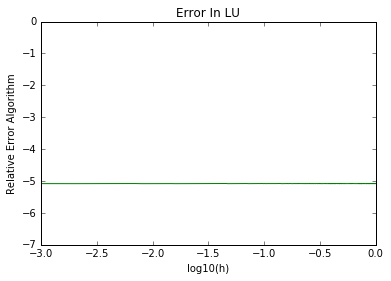

In [50]:
#Error Analysis
#We are looking to find the max relative error across the different methods and step sizes.
from array import *
i = 1
n=1000

#Step size h and coordinate value 
h=(x_f-x_0)/(n+1)
h_coor = h

Relative_Error_LU_max = -1000
Relative_Error_Algorithm_max = -1000
'''
The following loop will calculate the max error
The values for the algorithm are stored in X_algorithm[i]
The values for the LU Decomposition are stored in x_LU
'''
Relative_Error_Algorithm = array('d')
Relative_Error_LU = array('d')
log10_h_coor = array('d')

while (i < n):
    Relative_Error_Algorithm.append(math.log10(abs((Sol[i]-X_algorithm[i])/X_algorithm[i])))
    Relative_Error_LU.append(math.log10(abs((Sol[i]-x_LU[i])/x_LU[i])))
    log10_h_coor.append(math.log10(h_coor))
    if (Relative_Error_Algorithm[i-1] > Relative_Error_Algorithm_max):
        Relative_Error_Algorithm_max = Relative_Error_Algorithm[i-1]
    if (Relative_Error_LU[i-1] > Relative_Error_LU_max):
        Relative_Error_LU_max = Relative_Error_LU[i-1]
    i = i + 1
    h_coor = h_coor + h
print("Max Error in Algorithm for",n,"steps:",Relative_Error_Algorithm_max)
print("Max Error in LU for",n,"steps:",Relative_Error_LU_max)


#We would also like to see a plot of the error vs. log10(h)
%matplotlib inline
axes = plt.gca()
axes.set_xlim([math.log10(h),math.log10((x_f-x_0)-2*h)])
axes.set_ylim([-7.0,0])

#Algorithm Error
xlabel("log10(h)")
ylabel("Relative Error Algorithm")
title("Error In LU")
plot(log10_h_coor,Relative_Error_LU,color='green')